In [2]:
# import modules
import sympy as sy
import sympy.vector as vc
sy.init_printing(use_latex=True) # set ipython to use latex
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import HTML, display

## Exercise 1.3.1 Sympy


1) Use SymPy to form symbolic expressions for 𝑇, 𝑘, 𝜌 and 𝐶𝑝.


To begin with a coordinate system object is needed so that grad and divergence from the sympy.vector package can be used when finding the source term later. With this and several other sympy symbols the equations can be entered as given. I check them by printing equations in latex.

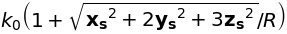

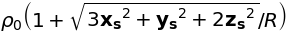

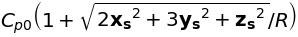

In [3]:
# declare coordinate system and symbols
s = vc.CoordSys3D('s')
x, y, z = s.x, s.y, s.z
t = sy.Symbol('t')
k_, r_, Cp_, t_, T_, R = sy.symbols(['k_0', 'rho_0', 'C_p0', 't_0', 'T_0', 'R'])  # constants

# Manufactured solution equations
T = T_ * (1 + sy.sin(x/R)**2 * sy.sin(2*y/R)**2 * sy.sin(3*z/R)**2) * sy.exp(t * (t_ - t)/ t_)
k = k_ * (1 + sy.sqrt(x**2 + 2*y**2 + 3*z**2)/R)
r = r_ * (1 + sy.sqrt(3*x**2 + y**2 + 2*z**2)/R)
Cp = Cp_ * (1 + sy.sqrt(2*x**2 + 3*y**2 + z**2)/R)

# print these equations
for eqn in (T, k ,r, Cp):
    display(eqn)

These all look as they are meant to from the lecture 11. 

2) Use these symbolic expressions to create a symbolic expression for the source, 𝑔.

Since the coordinate system was used finding the divergence and gradient symbolically can be done by sympy.vector package.

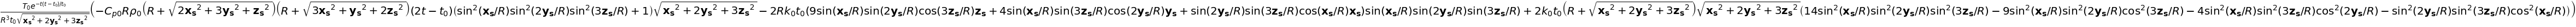

In [4]:
# find the source term
g = r * Cp * sy.diff(T, t) - vc.divergence(k * vc.gradient(T))
g = sy.simplify(g)
display(g)

This is incredibly long (explains why we should used sympy), but seems reasonable as:
- The source term exponentially decays in the same manner as the trial solution as one would expect (both go to zero)
- All symbols are still present
- x,y,z all appear either in a sin function or inside a square root together, in the same manner as all the input equations

Hence I can be fairly confident this is correct.